### Import module

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Load Data

In [11]:
data=pd.read_csv(r"C:\Users\hp\Downloads\Clean_Dataset.csv\Clean_Dataset.csv")
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [12]:
data=data.drop('Unnamed: 0',axis=1)
data.rename(columns={'class': 'classes'}, inplace=True)

### Exploratory Data Analysis

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   classes           300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [15]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [16]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,classes,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [17]:
data.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,classes,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [18]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
classes             0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
data.shape

(300153, 11)

In [20]:
data.duplicated().sum()

0

In [21]:
data1=data.groupby(['flight','airline'],as_index=False).count()
data1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

### Plotting

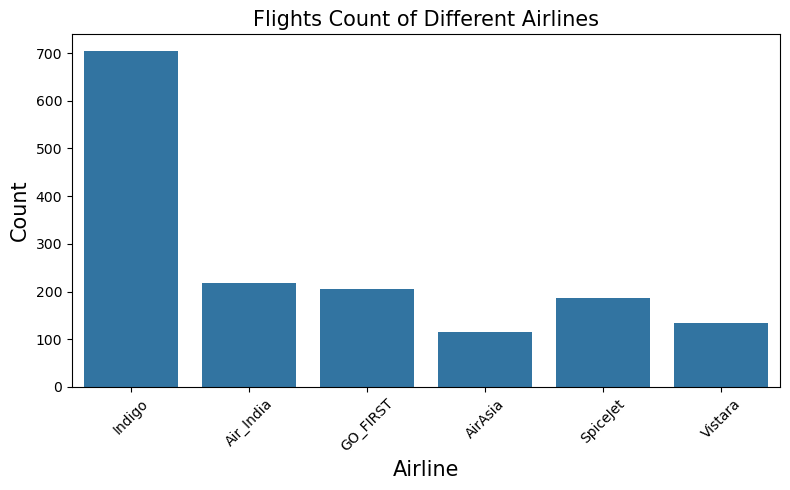

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airline', data=data1)  
plt.title('Flights Count of Different Airlines', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [24]:
data2=data.groupby(['flight','airline','classes'],as_index=False).count()
data2['classes'].value_counts()

classes
Economy     1560
Business     295
Name: count, dtype: int64

Most of the Airlines has Economic Class as common

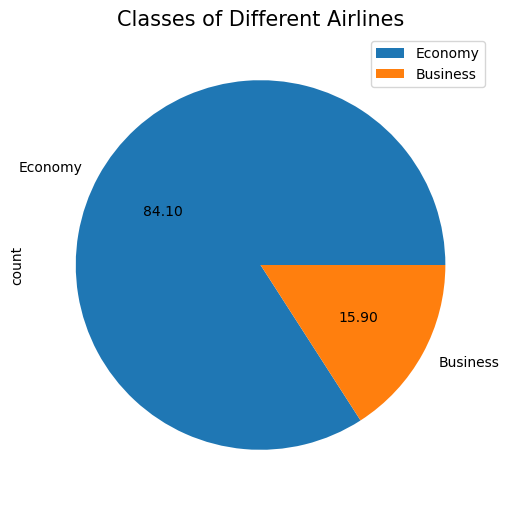

In [26]:
plt.figure(figsize=(8,6))
data2['classes'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

### Seperate feature and target

In [29]:
x=data.drop(['price'],axis=1)
y=data['price']

In [30]:
x.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,classes,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1


In [31]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

### Train test split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [34]:
x_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,classes,duration,days_left
2406,5,1516,2,5,0,4,5,1,13.42,14
275865,5,1518,3,4,0,2,2,0,9.58,23
297156,5,1486,1,1,0,2,4,0,11.17,29
12826,5,1546,2,2,0,5,0,1,5.08,16
93166,2,1122,0,4,0,5,2,1,12.58,45


In [35]:
y_train.head()

2406       8483
275865    51875
297156    55377
12826      4896
93166      6097
Name: price, dtype: int64

In [36]:
x_test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,classes,duration,days_left
27131,1,748,2,4,0,1,4,1,19.75,40
266857,5,1442,4,4,0,5,5,0,9.83,42
141228,5,1454,4,4,0,5,0,1,10.50,41
288329,5,1479,1,5,0,4,2,0,14.50,14
97334,1,743,0,0,0,5,5,1,8.25,20


In [37]:
y_test.head()

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
Name: price, dtype: int64

### Linear Regression

In [39]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [41]:
lr.score(x_train,y_train)

0.9045992290556947

In [42]:
lr.score(x_test,y_test)

0.9046721401431135

In [43]:
x_test_pred = lr.predict(x_test)
r2score=r2_score(x_test_pred,y_test)
mae=mean_absolute_error(x_test_pred,y_test)
mse=mean_squared_error(x_test_pred,y_test)
score=lr.score(x_test,y_test)
print("Score:",score)
print("R2 score:", r2score)
print("mean absolute error:", mae)
print("mean squared error:",mse)

Score: 0.9046721401431135
R2 score: 0.8950174639189217
mean absolute error: 4623.40880011927
mean squared error: 49062056.14963103


In [44]:
x_train_pred=lr.predict(x_train)
score=r2_score(x_train_pred,y_train)
score

0.8945380806438517

### DecisionTree Regression

In [46]:
dcr = DecisionTreeRegressor()
dcr.fit(x_train, y_train)

DecisionTreeRegressor()

### Model Evaluation

In [48]:
dcr.score(x_test,y_test)

0.9827530780242868

In [49]:
dcr.score(x_train,y_train)

0.9999097986789675

In [50]:
x_test_pred = dcr.predict(x_test)
r2score=r2_score(x_test_pred,y_test)
mae=mean_absolute_error(x_test_pred,y_test)
mse=mean_squared_error(x_test_pred,y_test)
score=dcr.score(x_test,y_test)
print("Score:",score)
print("R2 score:", r2score)
print("mean absolute error:", mae)
print("mean squared error:",mse)

Score: 0.9827530780242868
R2 score: 0.9827456739273025
mean absolute error: 908.7402697880344
mean squared error: 8876412.998792592


In [51]:
x_train_pred=dcr.predict(x_train)
score=r2_score(x_train_pred,y_train)
score

0.9999097905419552

### RandomForestRegressor

In [53]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
rfr.score(x_test,y_test)

0.9890108328723377

In [55]:
rfr.score(x_train,y_train)

0.9984514571542921

In [56]:
x_test_pred = rfr.predict(x_test)
r2score=r2_score(x_test_pred,y_test)
mae=mean_absolute_error(x_test_pred,y_test)
mse=mean_squared_error(x_test_pred,y_test)
score=rfr.score(x_test,y_test)
print("Score:",score)
print("R2 score:", r2score)
print("mean absolute error:", mae)
print("mean squared error:",mse)

Score: 0.9890108328723377
R2 score: 0.9889293735670619
mean absolute error: 894.9870863828771
mean squared error: 5655756.202483323


In [57]:
x_train_pred=rfr.predict(x_train)
score=r2_score(x_train_pred,y_train)
score

0.9984435993427214

### Making prediction system

In [59]:
input_data=(1,748,2,4,0,1,4,1,19.75,40)

#Changing the imput data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#Reshape the array as we are prediciting for one instance
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=dcr.predict(input_data_reshape)
print(prediction)

[7366.]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### Save to pickle file

In [61]:
import pickle

In [62]:
filename='flight_fare_model.sav'
pickle.dump(rfr,open(filename,'wb'))

In [63]:
# Loading the saved model

loaded_model=pickle.load(open(filename,'rb'))
loaded_model

RandomForestRegressor()

### User interface

In [69]:
import gradio as gr
import pickle
import numpy as np

#Load the trained model
model=pickle.load(open(r"C:\Users\hp\flight_fare_model.sav",'rb'))

#Define a prediction function

def predict_flight(airline,flight,source_city,departure_time,stops,arrival_time,destination_city,classes,duration,days_left):
    input_data=np.array([airline,flight,source_city,departure_time,stops,arrival_time,destination_city,classes,duration,days_left]).reshape(1,-1)
    prediction=model.predict(input_data)
    return f"Predicted Flight Price: ₹{prediction[0]:,.2f}"

#Create a Gardio interface
iface=gr.Interface(
    fn=predict_flight,
    inputs=[
        gr.Number(label='Airline'),
        gr.Number(label='Flight'),
        gr.Number(label='source city'),   
        gr.Number(label='Departure time'),
        gr.Number(label='stops'),
        gr.Number(label='Arrival time'),
        gr.Number(label='Destination city'),
        gr.Number(label='class'),
        gr.Number(label='duration'),
        gr.Number(label='Days left'),
    ],
    outputs='text',
    title="Flight Price Prediction",
    description="Enter the parameters to predict flight price"
)
#launch the interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
